<a href="https://colab.research.google.com/github/ShivaNavya/Word-embedding/blob/master/TF%20IDF%20for%20POS%20tags%20and%20Word%20embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import string
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.path.abspath(os.getcwd())
os.chdir('/content/drive/My Drive/Colab Notebooks/')

**Document cleaning**

In [0]:
def fileclean(file):
        file = open(file, encoding="utf8")
        Lines = file.readlines()


        #splitting the text file into lines
        words=[]
        for line in Lines:
            a=line.split()
            words.append(a)

            
        #Unlist the nested lists
        flat_list=[]
        for sublist in words:
            for item in sublist:
                flat_list.append(item)
        #converting words to lowercase
        flat_list = [x.lower() for x in flat_list]


        #remove stopwords         
        filtered_words = [word for word in flat_list if word not in stopwords.words('english')]

        #remove the punctuation
        #source: https://www.tutorialspoint.com/python/string_translate.htm

        list_withoutpunct=[]
        b=[]
        for item in filtered_words:
            b=item.translate(item.maketrans('', '', string.punctuation))
            list_withoutpunct.append(b)

        # print(str_withoutpunct)

        #remove the numbers
        numbers="1234567890"
        list_withoutnum=[]
        c=[]
        for item in list_withoutpunct:
            c=item.translate(item.maketrans('', '', numbers))
            list_withoutnum.append(c)
        # print(list_withoutnum)


        #remove the whitespace
        space= " "
        blank = ""
        list_withoutspace=[]
        d=[]
        for item in list_withoutnum:
            if item == space:
                list_withoutnum.remove(item)
            if item == blank:
                list_withoutnum.remove(item)


        #removing words with less than 3 length and finding unique words
        dict=[]
        for word in list_withoutnum:
            if len(word)>3:
              dict.append(word)

        uniqueWords = [] 
        for i in dict:
            if not i in uniqueWords:
                    uniqueWords.append(i);    

        #using isalpha to remove the symbols if any
        list_withoutisalpha=[]

        for item in uniqueWords:
          if item.isalpha()==True:
            list_withoutisalpha.append(item)
        #print(list_withoutisalpha)

        

        return (list_withoutisalpha)




In [0]:
#cleaning of the files

UIC = fileclean("UIC.txt")
Nytimes=fileclean("NYtimes.txt")
ESPN = fileclean("ESPN.txt")


In [0]:
#Appply POS tagging to each document

UIC_tag=nltk.pos_tag(UIC)
Nytimes_tag=nltk.pos_tag(Nytimes)
ESPN_tag=nltk.pos_tag(ESPN)


**Getting the counts of POS tags for the documents**

In [0]:
def dict_pos(postagfile):
  list_ofpos=[]
  for i in range(len(postagfile)):
      var=postagfile[i][1]
      list_ofpos.append(var) 
  return list_ofpos



In [0]:
#converting the tuple list to dictionary 

UIC_dict=dict_pos(UIC_tag)
Nytimes_dict=dict_pos(Nytimes_tag)
Espn_dict=dict_pos(ESPN_tag)

**Getting the count of POS tags**

In [0]:
def count_POS(filename_poslist):
  dataframe = pd.DataFrame(np.array(filename_poslist),columns=list("a"))
  dataframe = dataframe.groupby(['a']).size().reset_index(name='count')
  return dataframe


In [0]:
UIC_pos_df = count_POS(UIC_dict)
Nytimes_pos_df = count_POS(Nytimes_dict)
Espn_pos_df = count_POS(Espn_dict)

In [112]:
list1=UIC_pos_df.iloc[:,0].tolist()
list2=Nytimes_pos_df.iloc[:,0].tolist()
list3=Espn_pos_df.iloc[:,0].tolist()

uniq = list(set(list1+list2+list3))

df1 = pd.DataFrame(columns = uniq)
df2 = pd.DataFrame(0,index = np.arange(3),columns=uniq)


,RB,VBG,DT,RBR,VBP,CD,JJ,VBN,VB,IN,MD,VBD,EX,PRP,JJR,VBZ,JJS,NNP,NN,RP,NNS,FW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**creating the word vector**

In [0]:
#creating the word vector for the UIC

for i in range(len(uniq)):
 for j in range(len(UIC_pos_df)):
  if UIC_pos_df.iloc[j,0] == uniq[i]:
   df2.iloc[0,i] = UIC_pos_df.iloc[j,1]

In [0]:
#creating the word vector for the Nytimes

for i in range(len(uniq)):
 for j in range(len(Nytimes_pos_df)):
  if Nytimes_pos_df.iloc[j,0] == uniq[i]:
   df2.iloc[1,i] = Nytimes_pos_df.iloc[j,1]

In [0]:
#creating the word vector for the ESPN

for i in range(len(uniq)):
 for j in range(len(Espn_pos_df)):
  if Espn_pos_df.iloc[j,0] == uniq[i]:
   df2.iloc[2,i] = Espn_pos_df.iloc[j,1]

In [0]:
df2.rename(index={0: 'UIC', 1: 'NYtimes',2: 'ESPN'}, inplace=True)

In [22]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict
df2()

,RB,VBG,DT,RBR,VBP,CD,JJ,VBN,VB,IN,MD,VBD,EX,PRP,JJR,VBZ,JJS,NNP,NN,RP,NNS,FW
UIC,57,48,2,1,68,7,256,44,7,14,3,64,1,1,7,18,5,5,450,1,201,1
NYtimes,31,39,1,1,23,2,92,22,3,7,3,31,0,1,2,2,1,0,121,1,62,0
ESPN,30,25,1,3,18,3,69,18,4,11,3,34,0,0,2,8,2,0,147,0,42,0


**Dictionary for each file**

In [85]:


wordDictA = df2.T.to_dict()['UIC']
wordDictB = df2.T.to_dict()['NYtimes']
wordDictC = df2.T.to_dict()['ESPN']


1261

**writing the TF Function**

In [0]:


def computeTF(wordDict):
    tfDict = {}
    length = 0
    for word, count in wordDictA.items():
        length = length + count
    
    for word, count in wordDict.items():
        tfDict[word] = count/float(length)
    return(tfDict)
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA)
tfSecond = computeTF(wordDictB)
tfThird = computeTF(wordDictC)
#Converting to dataframe for visualization
tf = pd.DataFrame([tfFirst, tfSecond,tfThird])

tf.rename(index={0: 'UIC', 1: 'NYtimes',2: 'ESPN'}, inplace=True)


**IDF calculation**


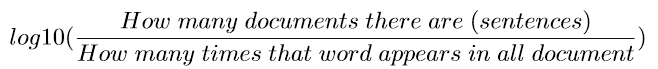

In [0]:


def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val) + 1)
    return idfDict
    
# #inputing our sentences in the log file
idfs = computeIDF([wordDictA, wordDictB, wordDictC])


**TFIDF calculcation for the documents**

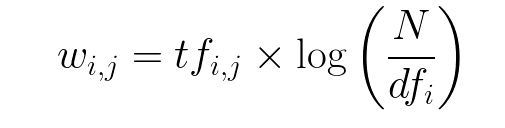

In [105]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

#running through the TFIDF function:
tfidfFirst = computeTFIDF(tfFirst,idfs)
tfidfSecond = computeTFIDF(tfSecond,idfs)
tfidfThird = computeTFIDF(tfThird,idfs)

#Converting to dataframe for visualization
tfidf_df = pd.DataFrame([tfidfFirst, tfidfSecond,tfidfThird])

tfidf_df.rename(index={0: 'UIC', 1: 'NYtimes',2: 'ESPN'}, inplace=True)
  
tfidf_df

,RB,VBG,DT,RBR,VBP,CD,JJ,VBN,VB,IN,MD,VBD,EX,PRP,JJR,VBZ,JJS,NNP,NN,RP,NNS,FW
UIC,0.031332,0.026385,0.001099,0.000550,0.037378,0.003848,0.140718,0.024186,0.003848,0.007696,0.001649,0.035180,0.001099,0.000727,0.003848,0.009894,0.002748,0.005497,0.247356,0.000727,0.110486,0.001099
NYtimes,0.017040,0.021438,0.000550,0.000550,0.012643,0.001099,0.050571,0.012093,0.001649,0.003848,0.001649,0.017040,0.000000,0.000727,0.001099,0.001099,0.000550,0.000000,0.066511,0.000727,0.034080,0.000000
ESPN,0.016490,0.013742,0.000550,0.001649,0.009894,0.001649,0.037928,0.009894,0.002199,0.006046,0.001649,0.018689,0.000000,0.000000,0.001099,0.004397,0.001099,0.000000,0.080803,0.000000,0.023087,0.000000


**Word embedding**

In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-03-19 07:40:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-19 07:40:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-19 07:40:49--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [0]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding ="utf8")
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype='float32')
  embeddings_index[word] = coefs
f.close()

In [0]:
u = embeddings_index['you']
embedd_index_UIC['you']=u
embedd_index_UIC['you']
len(UIC)

In [0]:
embedd_index_UIC = {}
for list in UIC:
  try:
      u= embeddings_index[list] 
  except KeyError:
      1
  embedd_index_UIC[list] = u   
len(embedd_index_UIC) 

In [0]:

UIC_embed_df = pd.DataFrame(embedd_index_UIC).T

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(UIC_embed_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [114]:
unique_words = []

for word in embedd_index_UIC.keys():
    unique_words.append(word)

NameError: ignored

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(UIC_embed_df)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [0]:

from sklearn.decomposition import PCA

P = principalComponents
plt.figure(figsize=(18, 10))
plt.scatter(P[10:60, 0], P[10:60, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[10:60, 0], P[10:60, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')